In [228]:
import pandas
df=pd.read_csv(r"C:\Users\Lenovo\Desktop\projet_baina\nouveau_projet\file (1).csv")

In [229]:
df.shape

(798, 20)

In [230]:
df1=df.copy()

In [231]:
df1=df1.drop_duplicates()
df1=df1.reset_index(drop=True)
df1.shape

(798, 20)

In [232]:
df1=df1.drop(["Unnamed: 0","country_from","country_to"],axis=1)

dropithom hyt db matalan country from rah kata3tyna nefs ma3loma d dawru , 2la 3rfna rah msha preimier league donc rah msha l england . hyt kol dawla fyha ghy dwru wahd 

In [233]:
occurrences_clubs = df1["club_from"].value_counts().unique()
occurrences_clubs

array([15, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1], dtype=int64)

In [234]:
df1["club_from"].unique()

array(['Borussia Dortmund', 'Ajax Amsterdam', 'Leicester City',
       'AS Monaco', 'Real Madrid', 'Real Sociedad', 'Juventus FC',
       'Manchester City', 'Liverpool FC', 'Chelsea FC',
       'Brighton & Hove Albion', 'ACF Fiorentina', 'Sevilla FC',
       'Leeds United', 'Everton FC', 'SL Benfica', 'SSC Napoli',
       'Atalanta BC', 'Valencia CF', 'Manchester United', 'Bayern Munich',
       'Sporting CP', 'AC Milan', 'CA River Plate', 'Olympique Lyon',
       'OGC Nice', 'FC Porto', 'LOSC Lille', 'Club Brugge KV',
       'Torino FC', 'Stade Rennais FC', 'Red Bull Salzburg',
       'SC Freiburg', 'Tottenham Hotspur', 'US Sassuolo', 'Fulham FC',
       'Atlético de Madrid', 'RB Leipzig', 'Wolverhampton Wanderers',
       'Stade Reims', 'SS Lazio', 'VfL Wolfsburg', 'TSG 1899 Hoffenheim',
       'Feyenoord Rotterdam', 'VfB Stuttgart', 'Arsenal FC',
       'RCD Espanyol Barcelona', 'Olympique Marseille', 'Burnley FC',
       'Eintracht Frankfurt', 'Rangers FC', 'RC Lens',
       'Manch

In [235]:
colonnes_categorielles = ['league_from', 'club_from', 'league_to', 'club_to']

for colonne in colonnes_categorielles:
    counts = df1[colonne].value_counts()
    categories_autre = counts[counts <5].index.tolist()
    df1[colonne] = df1[colonne].apply(lambda x: 'Autre' if x in categories_autre else x)

df_encoded = pd.get_dummies(df1, columns=colonnes_categorielles + ['position'] + ['loan'], dtype=int)


<Axes: >

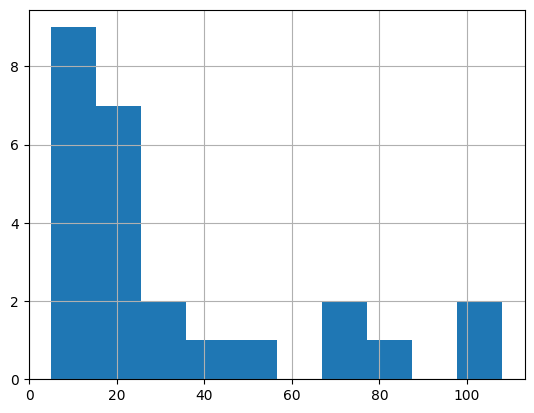

In [236]:
df1["league_from"].value_counts().hist()

In [237]:
df_encoded["fee"] = df_encoded["fee"].str.replace('k', '')
df_encoded["fee"]=df_encoded["fee"].astype(float)
df_encoded["market_value"] = df_encoded["market_value"].str.replace('k', '')
df_encoded["market_value"]=df_encoded["market_value"].astype(float)

In [242]:
df_encoded=df_encoded.dropna()
df_encoded=df_encoded.drop_duplicates()

In [247]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.model_selection import train_test_split
reg=LinearRegression()
X=df_encoded.drop(["fee","name"],axis=1)
y=df_encoded["fee"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1937)
reg.fit(X_train,y_train)

LinearRegression()

In [248]:
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 2.8384709176835514e+21
Mean Absolute Error: 5813030302.370015


In [264]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV

# Séparer les données en ensembles d'entraînement et de test
X = df_encoded.drop(["fee", "name"], axis=1)
y = df_encoded["fee"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1937)

# Définir les valeurs de alpha à tester
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

reg = Ridge()

param_grid = {'alpha': alphas}

grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_reg = grid_search.best_estimator_

y_pred = best_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Afficher les résultats
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Best alpha found:", best_reg.alpha)


Mean Squared Error: 4349.546846976118
Mean Absolute Error: 32.796402753633224
